In [153]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json 

import requests
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim
import folium
from sklearn.neighbors import KNeighborsClassifier
print('Libraries imported.')

Libraries imported.


In [154]:
df_Paris = pd.read_csv(r'D:\Study\Final_Assignment\laposte_hexasmal.csv',sep=';')
df1 = df_Paris[df_Paris['Nom_commune'].str.contains('PARIS ')]
df1.drop(['Code_commune_INSEE'],axis=1,inplace=True)
df1.drop(['Ligne_5'],axis=1,inplace=True)
df1.drop(['Libellé_d_acheminement'],axis=1,inplace=True)
df = df1.reset_index(drop=True)
df.drop([7],axis=0,inplace=True)
df[['longtitude', 'latitude']] = df['coordonnees_gps'].str.split(',', 2, expand = True)

C:\Users\jyzhang\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [155]:
df.drop(['coordonnees_gps'],axis=1,inplace=True)
Paris = df
Paris.rename(columns={'Nom_commune':'Neighborhood'},inplace=True)
Paris=Paris.reset_index(drop=True)


In [156]:
df_London = pd.read_excel('D:\Study\Final_Assignment\London.xlsx')
df_London.rename(columns={'Borough':'Neighborhood'},inplace=True)
df_London.rename(columns={'longitude':'longtitude'},inplace=True)
df_London.head()

,Neighborhood,Population (2013 est)[1],longtitude,latitude
0,Barking and Dagenham [note 1],194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


In [157]:
df = pd.concat([Paris,df_London],axis=0)
df1 = df.reset_index(drop=True)
df1.drop(['Code_postal'],axis=1,inplace=True)
df1.drop(['Population (2013 est)[1]'],axis=1,inplace=True)
df1

,Neighborhood,longtitude,latitude
0,PARIS 02,48.8679033789,2.34410716666
1,PARIS 03,48.8630541318,2.35936105897
2,PARIS 08,48.8725272666,2.31258256042
3,PARIS 14,48.8289932116,2.32710088326
4,PARIS 16,48.8603987604,2.2620995594
5,PARIS 17,48.8873371665,2.30748555949
6,PARIS 19,48.886868623,2.38469432787
7,PARIS 06,48.8489680919,2.33267089859
8,PARIS 12,48.8351562307,2.41980703497
9,PARIS 13,48.8287176845,2.36246822852


In [158]:
CLIENT_ID = 'USQRMYMSFBQ0Z4SF0KXZDWINR55CTA3VCPNHTNMYOMH0NVLB' 
CLIENT_SECRET = 'HKW2GKHKR1W23LK1J11L0OCGIS1WZD4ZBNNM2Y4WQ0SYOP3I' 
VERSION = '20180605' 
LIMIT = 100

In [159]:
def getNearbyVenues(names, latitudes, longitudes, radius=300):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [160]:
venues = getNearbyVenues(names=df1['Neighborhood'],
                                   latitudes=df1['longtitude'],
                                   longitudes=df1['latitude']
                                  )

PARIS 02
PARIS 03
PARIS 08
PARIS 14
PARIS 16
PARIS 17
PARIS 19
PARIS 06
PARIS 12
PARIS 13
PARIS 18
PARIS 01
PARIS 05
PARIS 09
PARIS 10
PARIS L HOPITAL
PARIS 04
PARIS 07
PARIS 11
PARIS 15
PARIS 16
PARIS 20
Barking and Dagenham [note 1]
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich [note 2]
Hackney
Hammersmith and Fulham [note 4]
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [161]:
print(venues.shape)
venues.head()

(1482, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,PARIS 02,48.8679033789,2.34410716666,Pizzeria Popolare,48.868074,2.343379,Pizza Place
1,PARIS 02,48.8679033789,2.34410716666,Nose,48.866242,2.344885,Perfume Shop
2,PARIS 02,48.8679033789,2.34410716666,L'Appartement Sézane,48.869574,2.345060,Women's Store
3,PARIS 02,48.8679033789,2.34410716666,Lockwood,48.867727,2.346945,Cocktail Bar
4,PARIS 02,48.8679033789,2.34410716666,Le Silencio,48.868998,2.343417,Nightclub


In [162]:
venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Barking and Dagenham [note 1],3,3,3,3,3,3
Barnet,4,4,4,4,4,4
Bexley,17,17,17,17,17,17
Brent,51,51,51,51,51,51
Bromley,13,13,13,13,13,13
Camden,27,27,27,27,27,27
Croydon,15,15,15,15,15,15
Ealing,27,27,27,27,27,27
Enfield,25,25,25,25,25,25


In [163]:
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

onehot['Neighborhood'] = venues['Neighborhood'] 

fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]
onehot.head()

,Neighborhood,African Restaurant,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auvergne Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Bookstore,Boutique,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burgundian Restaurant,Burrito Place,Bus Stop,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Casino,Caucasian Restaurant,Ch'ti Restaurant,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Corsican Restaurant,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Deli / Bodega,Dentist's Office,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Electronics Store,English Restaurant,Escape Room,Ethiopian Restaurant,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flower Shop,Food & Drink Shop,Food Court,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Okonomiyaki Restaurant,Optical Shop,Organic Grocery,Outdoor Event Space,Outdoor Sculpture,Outdoor Supply Store,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pharmacy,Piano Bar,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Resort,Restaurant,Romanian Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,PARIS 02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,PARIS 02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [164]:
grouped = onehot.groupby('Neighborhood').mean().reset_index()
grouped.head()

,Neighborhood,African Restaurant,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auvergne Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Bookstore,Boutique,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burgundian Restaurant,Burrito Place,Bus Stop,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Casino,Caucasian Restaurant,Ch'ti Restaurant,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Corsican Restaurant,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Deli / Bodega,Dentist's Office,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Electronics Store,English Restaurant,Escape Room,Ethiopian Restaurant,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flower Shop,Food & Drink Shop,Food Court,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Okonomiyaki Restaurant,Optical Shop,Organic Grocery,Outdoor Event Space,Outdoor Sculpture,Outdoor Supply Store,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pharmacy,Piano Bar,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Resort,Restaurant,Romanian Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Barking and Dagenham [note 1],0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,

In [165]:
num_top_venues = 5

for hood in grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = grouped[grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham [note 1]----
                 venue  freq
0          Golf Course  0.33
1   Athletics & Sports  0.33
2  Martial Arts School  0.33
3         Perfume Shop  0.00
4      Organic Grocery  0.00


----Barnet----
          venue  freq
0          Café  0.50
1      Bus Stop  0.25
2  Home Service  0.25
3     Nightclub  0.00
4  Optical Shop  0.00


----Bexley----
                 venue  freq
0                  Pub  0.18
1          Supermarket  0.12
2     Department Store  0.06
3             Pharmacy  0.06
4  American Restaurant  0.06


----Brent----
                 venue  freq
0          Coffee Shop  0.12
1       Clothing Store  0.10
2  Sporting Goods Shop  0.08
3       Sandwich Place  0.06
4   Italian Restaurant  0.04


----Bromley----
                  venue  freq
0        Clothing Store  0.15
1            Donut Shop  0.08
2             Bookstore  0.08
3  Gym / Fitness Center  0.08
4           Coffee Shop  0.08


----Camden----
                venue  freq
0              

In [166]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [167]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = grouped['Neighborhood']

for ind in np.arange(grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham [note 1],Athletics & Sports,Martial Arts School,Golf Course,Yoga Studio,Food & Drink Shop,Gift Shop,German Restaurant,Gastropub,Garden,Gaming Cafe
1,Barnet,Café,Home Service,Bus Stop,Food Court,Gluten-free Restaurant,Gift Shop,German Restaurant,Gastropub,Garden,Gaming Cafe
2,Bexley,Pub,Supermarket,Department Store,Hotel,Discount Store,Pharmacy,Fast Food Restaurant,Clothing Store,Chinese Restaurant,Furniture / Home Store
3,Brent,Coffee Shop,Clothing Store,Sporting Goods Shop,Sandwich Place,Hotel,American Restaurant,Italian Restaurant,Grocery Store,Bar,Restaurant
4,Bromley,Clothing Store,Café,Bookstore,Department Store,Cosmetics Shop,Coffee Shop,Electronics Store,Burger Joint,Gym / Fitness Center,Sushi Restaurant
5,Camden,Hotel,Coffee Shop,Italian Restaurant,Gift Shop,Bar,Café,Chocolate Shop,Breakfast Spot,Sandwich Place,Sushi Restaurant
6,Croydon,Pub,Portuguese Restaurant,Caribbean Restaurant,Café,Nightclub,Burger Joint,Gaming Cafe,Sushi Restaurant,Coffee Shop,Museum
7,Ealing,Coffee Shop,Pizza Place,Vietnamese Restaurant,Hotel,Bakery,Italian Restaurant,Bar,Sandwich Place,Spanish Restaurant,Sporting Goods Shop
8,Enfield,Coffee Shop,Café,Pub,Clothing Store,Bar,Pharmacy,Department Store,Italian Restaurant,Deli / Bodega,Fast Food Restaurant
9,Greenwich [note 2],Fast Food Restaurant,Pub,Coffee Shop,African Restaurant,Bookstore,Furniture / Home Store,Pharmacy,Pizza Place,Discount Store,Plaza


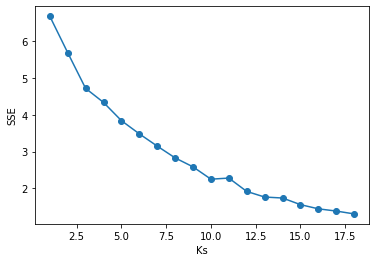

In [168]:
grouped_clustering = grouped.drop('Neighborhood', 1)
SSE = [] 
for i in range(1,19): 
     km = KMeans(n_clusters=i) 
     km.fit(grouped_clustering)
     SSE.append(km.inertia_)
plt.plot(range(1, 19), SSE, marker='o')
plt.xlabel('Ks')
plt.ylabel('SSE')
plt.show()

In [169]:
from sklearn.cluster import KMeans
kclusters = 10
kmeans = KMeans(n_clusters=kclusters).fit(grouped_clustering)
kmeans.labels_

array([8, 6, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 7, 3, 0, 0, 9, 0, 0, 0, 0, 0,
       0, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 1, 5, 5, 5, 5,
       2, 0, 0, 0, 0, 0, 0, 0, 5])

In [170]:
neighborhoods_venues_sorted.drop
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
merged1 = df1
merged1 = merged1.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
merged1 

,Neighborhood,longtitude,latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,PARIS 02,48.8679033789,2.34410716666,5,French Restaurant,Bakery,Salad Place,Bar,Wine Bar,Gym,Coffee Shop,Cocktail Bar,Sandwich Place,Bistro
1,PARIS 03,48.8630541318,2.35936105897,0,Burger Joint,Sandwich Place,Dessert Shop,Café,Gluten-free Restaurant,Farmers Market,Cheese Shop,Chinese Restaurant,Okonomiyaki Restaurant,Moroccan Restaurant
2,PARIS 08,48.8725272666,2.31258256042,5,French Restaurant,Hotel,Salad Place,Bar,Italian Restaurant,Japanese Restaurant,Bakery,Creperie,Café,Middle Eastern Restaurant
3,PARIS 14,48.8289932116,2.32710088326,5,Hotel,Bistro,Bakery,Fast Food Restaurant,French Restaurant,Pizza Place,Italian Restaurant,Food & Drink Shop,Gaming Cafe,Furniture / Home Store
4,PARIS 16,48.8603987604,2.2620995594,1,Park,Yoga Studio,Gluten-free Restaurant,German Restaurant,Gastropub,Garden,Gaming Cafe,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint
5,PARIS 17,48.8873371665,2.30748555949,5,Hotel,French Restaurant,Bakery,Italian Restaurant,Bus Stop,Plaza,Escape Room,Food Court,Café,Grocery Store
6,PARIS 19,48.886868623,2.38469432787,5,Bar,African Restaurant,Supermarket,Japanese Restaurant,Italian Restaurant,French Restaurant,Concert Hall,Spa,Burger Joint,Bakery
7,PARIS 06,48.8489680919,2.33267089859,5,Hotel,Café,French Restaurant,Bakery,Chocolate Shop,Pastry Shop,Playground,Boutique,Sandwich Place,Supermarket
8,PARIS 12,48.8351562307,2.41980703497,4,Restaurant,Monument / Landmark,Yoga Studio,Flower Shop,German Restaurant,Gastropub,Garden,Gaming Cafe,Furniture / Home Store,Frozen Yogurt Shop
9,PARIS 13,48.8287176845,2.36246822852,5,French Restaurant,Stadium,Trail,Soccer Field,Chinese Restaurant,Park,Escape Room,Ethiopian Restaurant,Gastropub,Garden


In [172]:
merged1.loc[merged1['Cluster Labels'] == 5, merged1.columns[[0] + list(range(4, merged1.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,PARIS 02,French Restaurant,Bakery,Salad Place,Bar,Wine Bar,Gym,Coffee Shop,Cocktail Bar,Sandwich Place,Bistro
2,PARIS 08,French Restaurant,Hotel,Salad Place,Bar,Italian Restaurant,Japanese Restaurant,Bakery,Creperie,Café,Middle Eastern Restaurant
3,PARIS 14,Hotel,Bistro,Bakery,Fast Food Restaurant,French Restaurant,Pizza Place,Italian Restaurant,Food & Drink Shop,Gaming Cafe,Furniture / Home Store
5,PARIS 17,Hotel,French Restaurant,Bakery,Italian Restaurant,Bus Stop,Plaza,Escape Room,Food Court,Café,Grocery Store
6,PARIS 19,Bar,African Restaurant,Supermarket,Japanese Restaurant,Italian Restaurant,French Restaurant,Concert Hall,Spa,Burger Joint,Bakery
7,PARIS 06,Hotel,Café,French Restaurant,Bakery,Chocolate Shop,Pastry Shop,Playground,Boutique,Sandwich Place,Supermarket
9,PARIS 13,French Restaurant,Stadium,Trail,Soccer Field,Chinese Restaurant,Park,Escape Room,Ethiopian Restaurant,Gastropub,Garden
10,PARIS 18,Bar,French Restaurant,Theater,Italian Restaurant,Gastropub,Supermarket,Mediterranean Restaurant,Gym,Middle Eastern Restaurant,Café
11,PARIS 01,Plaza,Coffee Shop,Italian Restaurant,Historic Site,Café,Bar,Art Museum,Garden,Hotel,Furniture / Home Store
12,PARIS 05,French Restaurant,Bar,Hotel,Creperie,Bakery,Sushi Restaurant,Plaza,Lebanese Restaurant,Chinese Restaurant,Ice Cream Shop


In [173]:
address = 'Paris'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [174]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(merged1['longtitude'], merged1['latitude'], merged1['Neighborhood'], merged1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters